# Finding the Least Squares Line

## Computing Gradient of RSS

We want to find the min of the gradient.

$\min\limits_{w_0,w_1} \sum_{i=1}^{N} (y_i - [w_0 + w_1 x_i])^2$

$RSS(w_0, w_1) = \sum_{i=1}^{N} (y_i - [w_0 + w_1 x_i])^2$

Computing the gradient (do a derivative based on the above sum)

Step 1: Get the derivative which is -

$\frac{d}{dw}\sum_{i=1}^{N} (y_i - [w_0 + w_1 x_i])^2$

Step 2: Put the derivatives together as the gradient of RSS


$\nabla RSS(w_0, w_1) = \begin{bmatrix} 
-2 \sum_{i=1}^{N} [y_i - (w_0 + w_1 x_i)] \\
-2 \sum_{i=1}^{N} [y_i - (w_0 + w_1 x_i)]x_i \\
\end{bmatrix}$



## First Approach - Closed-form solution

1. Set Gradient = 0
2. Solve w0 and w1

In order to get w0 and w1, we will first need to compute the following:

1. $\sum_{i=1}^{N}y_i$
2. $\sum_{i=1}^{N}x_i$
3. $\sum_{i=1}^{N}y_ix_i$
4. $\sum_{i=1}^{N}{x_i}^2$

With these 4, we can the solve the RSS gradient for $w_0$ and $w_1$ using the two terms in the RSS gradient

The first term, once you shift all the stuff around, will look like this:

$\hat{w_0} = \frac{\sum_{i=1}^{N}y_i}{N} - \hat{w_1}\frac{\sum_{i=1}^{N}x_i}{N}$

For the second term, we will have something like this (have not shift yet):
$\sum_{i=1}^{N}y_ix_i - \hat{w_0}\sum_{i=1}^{N}x_i - \hat{w_1}\sum_{i=1}^{N}{x_i}^2$

With this, we plug in the $\hat{w_0}$ equation into the second term. We get:

$\hat{w_1} = \frac{\sum_{i=1}^{N}y_ix_i - \frac{\sum_{i=1}^{N}y_i\sum_{i=1}^{N}x_i}{N}}{\sum_{i=1}^{N}{x_i}^2 - \frac{\sum_{i=1}^{N}x_i\sum_{i=1}^{N}x_i}{N}}$


Below is an example of how to compute regression parameters (closed form style)

x and y are defined.

In [1]:
x = np.array([0,1,2,3,4])
y = np.array([1,3,7,13,21])

We now find the $w_1$ with the equation above.

$\hat{w_1} = \frac{\sum_{i=1}^{N}y_ix_i - \frac{\sum_{i=1}^{N}y_i\sum_{i=1}^{N}x_i}{N}}{\sum_{i=1}^{N}{x_i}^2 - \frac{\sum_{i=1}^{N}x_i\sum_{i=1}^{N}x_i}{N}}$

In [8]:
numerator = sum(x*y) - ((sum(y)*sum(x))/len(x))
denominator = sum(x**2) - (sum(x)*sum(x))*(1/len(x))
slope = numerator/denominator


To get the intercept, we plug the slope into the $w_0$ equation. 

Recall the equation is -

$\hat{w_0} = \frac{\sum_{i=1}^{N}y_i}{N} - \hat{w_1}\frac{\sum_{i=1}^{N}x_i}{N}$

In [12]:
intercept = (sum(y) - slope*(sum(x)))/len(x)

In [13]:
print(slope)
print(intercept)

5.0
-1.0


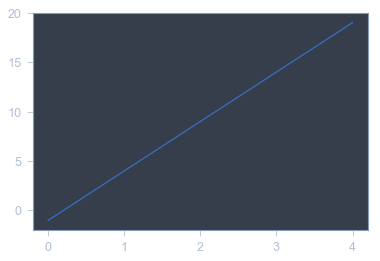

In [14]:
y = slope*x + intercept
plt.plot(x, y)